In [24]:
import numpy as np
import scipy


def gradStep(x, grad, stepSize):
    return x - stepSize*grad(x)


# in general
def descAlgs(x, step, direction):
    return x - step * direction

def NewtonStep(x, grad, Hessian, stepSize=1):
    try:
        d = np.linalg.inv(Hessian(x)) @ grad(x) # np.linalg.solve(Hessian(x), grad(x))
    except Exception:
        print(Exception)
        d = np.zeros(x.shape)
    return x - stepSize*d
    
    #return x - stepSize * np.linalg.inv(Hessian(x)) @ grad(x)

In [25]:
steps = 10000
stepSize = 0.01
x0 = np.array([100,50])

def f(x):
    return 100*x[0]**2+x[1]**2

def gradF(x):
    return np.array([200*x[0], 2*x[1]])

def HessianF(x):
    return np.array([[200, 0], [0, 2]])
x = x0
for i in range(steps):
    x = gradStep(x, gradF, stepSize)

print(x)
stepSize = 0.1
x = x0
for i in range(steps):
    x = NewtonStep(x, gradF, HessianF, stepSize)

print(x)

[1.00000000e+02 9.11437576e-87]
[2.e-323 2.e-323]


Lets first calculate the gradient and the Hessian of the Rosenbrock function.

$f(x) = (a-x_1)^2 + b(x_2-x_1^2)^2$


It has 2 params $a$ and $b$ which will be set to $a=1, b=100$ in the later analysis.
The Gradient is as follows by applying mainly the chain rule:

$\nabla f(x) = \begin{pmatrix}-2(a-x_1) - 4x_1b(x_2-x_1^2) \\ 2b(x_2 - x_1^2)\end{pmatrix}$

For the Hessian we get the following expression after some calculations according to chain and product rule (and of course some reordering of terms):


$\nabla^2 f(x) = \begin{pmatrix} 2 -(4b(x_2-3x_1^2)) && -4bx_1 \\
-4bx_1 && 2b \end{pmatrix}$

In [26]:
import numpy as np
import matplotlib.pyplot as plt


In [27]:
# initial definition of function and gradients

def Rosenbrock(x, a=1, b=100):
    return (a-x[0])**2+b*(x[1]-x[0]**2)**2

def RosenbrockFast(x, y, a=1, b=100):
    return Rosenbrock(np.array([x,y]), a, b)


def RosenbrockGrad(x, a=1, b=100, getDir=False):
    if getDir:
        startHeight = Rosenbrock(x)
        grad = np.array([
            -2*(a-x[0])- 4*x[0]*b*(x[1]-x[0]**2),
            2*b*(x[1]-x[0]**2)])
        endHeight = Rosenbrock(x + grad)
        return np.array([grad[0], grad[1], endHeight-startHeight])
    else:
        return np.array([
            -2*(a-x[0])- 4*x[0]*b*(x[1]-x[0]**2),
            2*b*(x[1]-x[0]**2)
            ])

def RosenbrockFastGrad(x, y, a=1, b=100, getDir=False):
    return RosenbrockGrad(np.array([x,y]), a, b, getDir)

def RosenbrockHessian(x, a=1, b=100):
    return np.matrix([
        [2 - 4*b*(x[1]-3*x[0]**2), -4*b*x[0]],
        [-4*b*x[0], 2*b]
    ])

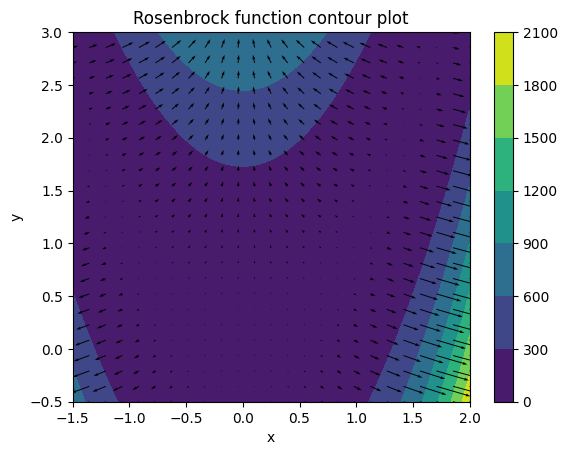

In [28]:
# Countour plot of f(x) for the Rosenbrock function
x = np.linspace(-1.5, 2, 1000)
y = np.linspace(-0.5, 3, 1000)
X, Y = np.meshgrid(x, y)
Z = RosenbrockFast(X,Y)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) 
ax.set_title('Rosenbrock function contour plot')


#gradient plot
x1 = np.linspace(-1.5, 2, 25)
x2 = np.linspace(-0.5, 3, 25)
XGrad, YGrad = np.meshgrid(x1,x2)
zStart = RosenbrockFast(XGrad,YGrad)
grads = RosenbrockFastGrad(XGrad,YGrad, 1, 100, True)


ax.quiver(XGrad, YGrad, grads[0,:,:], grads[1,:,:])
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

We can see. that the Rosenbrock function increases quickly towards the edges of the plot, while having a big deep valley with small values in the area of low values around the minimum.

Additionally, we can see, that the gradients(note the arrows are automatically scaled to fit in the picture) in the valley are all very low compared to the ones around it.

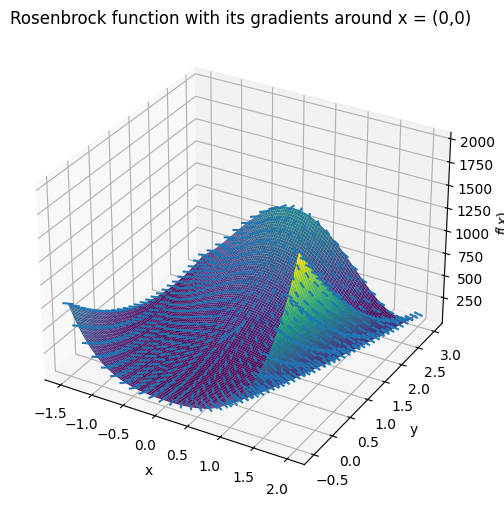

In [29]:
from turtle import color


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')


x1 = np.linspace(-1.5, 2, 100)
x2 = np.linspace(-0.5, 3, 100)
X, Y = np.meshgrid(x1,x2)
Z = RosenbrockFast(X,Y)


ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('Rosenbrock function with its gradients around x = (0,0)')
#add gradient information

# 3d gradients not really sweet on this one thats why we are normalizing
#norms = np.apply_along_axis(scipy.linalg.norm, 0, grads)
#grads *= 200/max(norms.flatten())
ax.quiver(XGrad, YGrad, zStart, grads[0,:,:], grads[1,:,:], grads[2,:,:], arrow_length_ratio=0.3, normalize = True)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("$f(x)$")
plt.show()


In the surface plot we can see the Valley structure and the gradients, note that all of them are normalized, because otherwise the different scales of x,y and the z axes would negate all interpertability from the plot.

In [ ]:
from cProfile import label
import plotly.graph_objects as go
import plotly.express as px


#basic surface plot
x1 = np.linspace(-2, 2.5, 100)
x2 = np.linspace(-2, 3.5, 100)
X, Y = np.meshgrid(x1,x2)
Z = RosenbrockFast(X,Y)
fig = go.Figure(data =
    go.Contour(
        z=Z,
        x=x1,
        y=x2,
        colorbar=dict(
            title='f(x)', # title here
            titleside='right',
            titlefont=dict(
                size=14,
                family='Arial, sans-serif')
        )
    )
)
#variables of our thingy
numStartPoints = 30
numSteps = 150000 #the maximum number of allowed iterations
X,Y = np.meshgrid(np.linspace(-1.5, -2, numStartPoints), np.linspace(-0.5, -3,numStartPoints))
startPoints = [(np.random.uniform(-1.5, 2),np.random.uniform(-0.5, 3)) for x in range(numStartPoints)]
stepSizes = [0.0075, 0.005, 0.001, 0.0005, 0.0001]
colors = {
    0.0075: px.colors.sequential.Blues,
    0.005: px.colors.sequential.Magenta,
    0.001: px.colors.sequential.Oranges,
    0.0005: px.colors.sequential.ice,
    0.0001: px.colors.sequential.Reds
}

js = dict((stepSize, 0) for stepSize in stepSizes)
for stepSize in stepSizes:
    print(stepSize)
    for x0 in startPoints:
        print(stepSize)
        path = np.ones((numSteps+1, 2))
        path[0] = x0
        for i in range(numSteps):
            i = i+1
            path[i] = gradStep(path[i-1], RosenbrockGrad, stepSize)
            if np.linalg.norm(RosenbrockGrad(path[i])) < 0.001:
                break
        #first try for the thing?
        if Rosenbrock(path[i])<=100 and js[stepSize] < len(colors[stepSize]): #only plot if we converge adn we still have colors left
            #plotting with plotly
            trace = go.Scatter(x=path[:,0],
                               y=path[:,1],
                               mode="lines",
                               line=go.scatter.Line(color=colors[stepSize][js[stepSize]]),
                               showlegend=True,
                               name=f"Example path {js[stepSize]} for stepsize {stepSize}")
            fig.add_trace(trace)
            js[stepSize] += 1
        print(f"We got from {path[0]} to {path[i]} in {i} steps and decreased the value from {Rosenbrock(path[0])} to {Rosenbrock(path[i])} while using stepsize {stepSize}")


fig.update_layout(legend=dict(
    yanchor="top",
    y=-0.05,
    xanchor="left",
    x=0.01,
    orientation = "h"
    ),
                  yaxis=dict(
                      title="y"                
                      
                  ),
                  xaxis=dict(
                      title="x"                
                      
                  ))
fig.show()

We can observe the following things:
For $stepsizes>0.0075$ we barely converge or even go to $\infty$, thats why we only look into lower stepsizes.

For the higher stepsizes ($0.0075, 0.005, 0.001$) the gradient descent algorithm first takes big steps towards the valley until jumps around a lot in the valley ($0.0075, 0.005$), until it goes further to the minimal point ($0.001$).

Around the minimum (most of the times already in the valley) the gradient descent algorithm only goes on to take small steps towards the minimum, bc the gradients already nearly vanishes and the stepsizes have to be choosen pretty small, otherwise we'd never reach the valley in the first place, even though we're already starting pretty close to it. The lower we choose the stepsize, the more distant is the endpoint after $150000$ iterations from the minimum. Only the stepsizes $0.001 and 0.0005$ seem to be able to early terminate and reach the stop condition (usually between $3000$ and $30000$ steps) in some starting points. $0.0001$ reaches the stop condition sometimes to, but only after about $120000$ iterations, because the convergence for that small stepsizes is way to slow.

Now we start with the Newton experiments

In [ ]:
#basic surface plot
x1 = np.linspace(-3, 2.5, 150)
x2 = np.linspace(-3, 3.5, 150)
X, Y = np.meshgrid(x1,x2)
Z = RosenbrockFast(X,Y)
figNewton = go.Figure(data =
    go.Contour(
        z=Z,
        x=x1,
        y=x2,
        colorbar=dict(
            title='f(x)', # title here
            titleside='right',
            titlefont=dict(
                size=14,
                family='Arial, sans-serif')
        )
    )
)

#created via colorRampPalette(brewer.pal(8,"Set2"))(30) %>% paste(collapse="', '") in R
colorsNewton = ['#66C2A5', '#8AB594', '#AEA884', '#D29B74', '#F68E64', '#E59077', '#CA9591', '#AF9AAA', '#949EC3', '#9C9CC9', '#B296C7', '#C791C5', '#DD8CC3', '#DE94B3', '#CEA798', '#BEBA7E', '#AECD63', '#AFD850', '#C4D847', '#DAD83E', '#EFD835', '#FDD735', '#F6D24E', '#F0CD66', '#EAC87F', '#E3C395', '#D7BF9C', '#CBBBA4', '#BFB7AB', '#B3B3B3']


for j, x0 in enumerate(startPoints):
    path = np.ones((150001, 2))
    path[0] = x0
    for i in range(150000):
        i = i+1
        path[i] = NewtonStep(path[i-1], RosenbrockGrad, RosenbrockHessian)
        if np.linalg.norm(RosenbrockGrad(path[i])) < 0.001 or np.linalg.norm(path[i]-path[i-1])==0:
            break
    #plotting
    trace = go.Scatter(x=path[:,0],
                       y=path[:,1],
                       mode="lines",
                       line=go.scatter.Line(color=colorsNewton[j]),
                       showlegend=True,
                       name=f"Example path {j} for stepsize Newton's method")
    figNewton.add_trace(trace)
    print(f"We got from {path[0]} to {path[i]} in {i} steps and decreased the value from {Rosenbrock(path[0])} to {Rosenbrock(path[i])} while using Newton's method")
    
    
figNewton.update_layout(legend=dict(
    yanchor="top",
    y=-0.05,
    xanchor="left",
    x=0.01,
    orientation = "h"
    ),
                  yaxis=dict(
                      title="y"                
                      
                  ),
                  xaxis=dict(
                      title="x"                
                      
                  ))
figNewton.show()

The Newton Method specialises the  descent direction by taking the bending of the curve (Hessian) into account while looking for the best direction, at the same time there is no need for stepsizes (in 2.1 the formula takes stepsizes into account, but the hessian already gives a good indicator for the length of the step which can be seen by taking different stepsizes as in 1.3 (just switch out gradSteo for NewtonStep there)). By this we now only need 3 to 5 steps to reach the minimum from a proper neighbourghhood of the minimum.

We can observe, that the method takes (if feasible) long steps towards the minimum and only short steps elsewise.